# Exploratory Data Analysis on Social Network Ads¶
- Social Network Ads data set is a categorical dataset to determine whether a user purchased a particular product based on     their interest.¶

<b>Importing required modules</b>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

- Matplotlib and Seaborn
  * These modules are used for plotting, visualizing and gaining insights on the data
- Pandas
  * For manipulating and working on the data files like csv's, xlsx, jason and many more files
- Numpy
   * For numerical and basic statistical operations


In [2]:
data=pd.read_csv("Social_Network_Ads.csv")

In [3]:
data.head()
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


- pandas head method gives the first five lines of the dataset
- Pandas describe method gives a lot of insight on the data like mean, stnadard deviation, quartiles, min and max values. But humans are very much good with understanding something by images rather than crunching numbers, so we will be using different kinds of plots to understand what the data is trying to tell us


<b>pairplot</b>
- Seaborn module's pairplot method is a powerful tool that gives a ton of inormation regarding each and every pair of features in data set. It even provides us with the PDF of the data. You can see it from the below plot

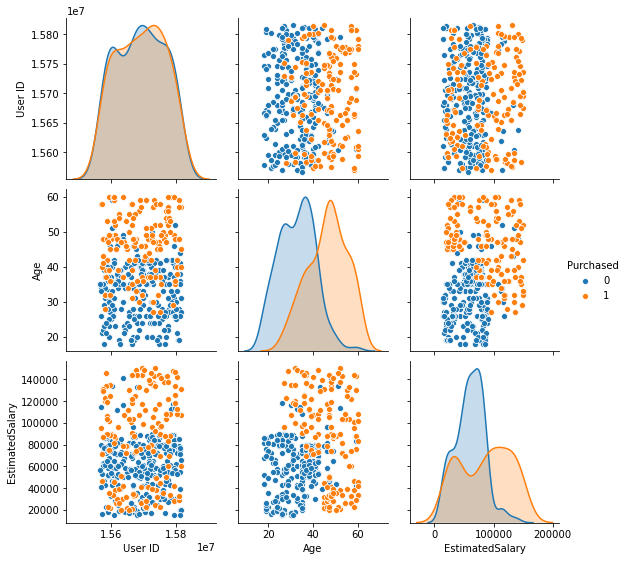

In [5]:
sns.pairplot(data=data,hue ='Purchased')

- From the above plot we can easily understand that Age and Estimated Salary can help us to differentiate between the people who have bought the product and who did'nt.
- So from now on i will be using age and estimated salary to gain insights on the data

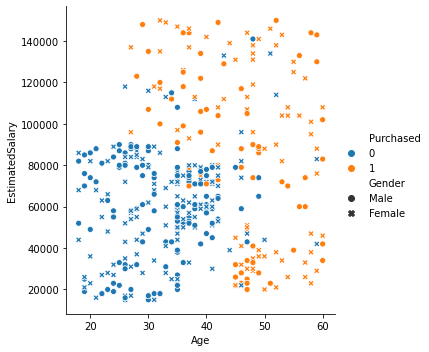

In [6]:
sns.relplot(x='Age',y="EstimatedSalary",data=data,hue='Purchased',style="Gender")

In [7]:
print('Purchased Males:',data[(data['Purchased']==1) & (data['Gender']=='Male')]['User ID'].count(),end='\t')
print('total males:',data[data['Gender']=='Male']['User ID'].count())
print('Purchased Females:',data[(data['Purchased']==1) & (data['Gender']=='Female')]['User ID'].count(),end='\t')
print('total Females:',data[data['Gender']=='Female']['User ID'].count())


Purchased Males: 66	total males: 196
Purchased Females: 77	total Females: 204


- I further differentiated the people if they have purchased the product or not based on their gender
- From the above two cell's of code we can see that women made more purchases than the males. (As everyone expected EXTREME SARCASM)
- But we will be classifying the people based on their Age and Salary

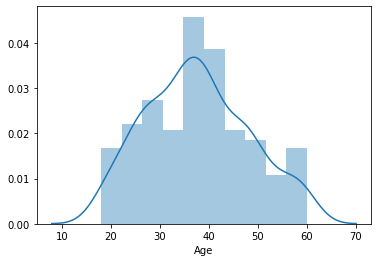

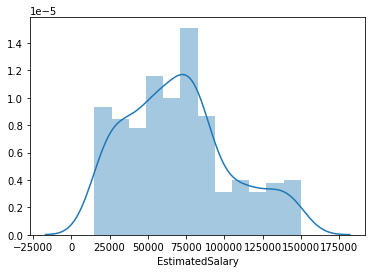

In [8]:
sns.distplot(data['Age'])
plt.figure(2)
sns.distplot(data['EstimatedSalary'])

- From the above Distribution Plots we can see the average age and salary, and the way they are distributed, it even provides us with the probablilities but we will dive a bit deep and know much more about the data

In [9]:
age_counts,age_a=np.histogram(data[data['Purchased']==1]['Age'])
print( age_counts,age_a)

[ 6  7  9 17  9 14 36 12 10 23] [27.  30.3 33.6 36.9 40.2 43.5 46.8 50.1 53.4 56.7 60. ]


In [10]:
salary_counts,salary_s=np.histogram(data[data['Purchased']==1]['EstimatedSalary'])

- Numpy's histogram method return's histograms bin's and probabilities.
  Using those we can draw PDF and CDF.
  In the below code I plotted both PDF and CDF of age and salary of the purchased people

In [11]:
age_pdf=age_counts/np.sum(age_counts)
age_cdf=np.cumsum(age_pdf)
salary_pdf=salary_counts/np.sum(salary_counts)
salary_cdf=np.cumsum(salary_pdf)

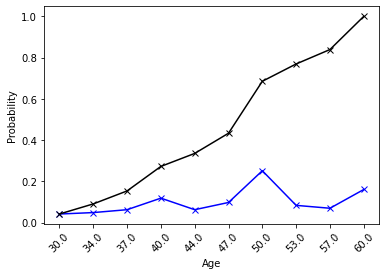

In [12]:
plt.plot(age_pdf,'b-x',age_cdf,'k-x')
plt.xticks(ticks=range(age_a.size-1),labels=np.round(age_a[1:]),rotation=45)
plt.xlabel('Age')
plt.ylabel('Probability')
plt.show()

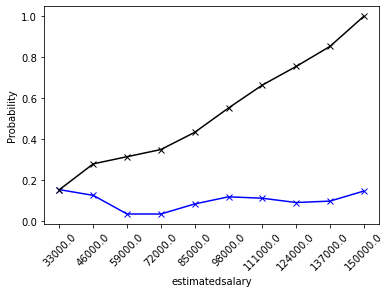

In [35]:
plt.plot(salary_pdf,'b-x',salary_cdf,'k-x')
plt.xticks(ticks=range(salary_s.size-1),labels=np.round(salary_s[1:]),rotation=45)
plt.xlabel('estimatedsalary')
plt.ylabel('Probability')
plt.show()

- From the above plot's we can see that:
- 25% of the people that bought the product are under 31 years
- 50% of the people that bought the product are under 39 years
- 75% of the people that bought the product are under 45 years
- And with that being said:
- 25% of the people that bought the product have their salary under 46k
- 50% of the people that bought the product have their salary under 98k
- 75% of the people that bought the product have their salary under 124k
- These 25%, 50% and 75% are called quartiles
- At last we found some useful information, but the above work can also be done in another way, let's see that too


#  boxplot

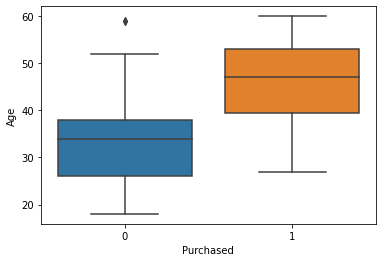

In [14]:
sns.boxplot(x=data['Purchased'],y=data['Age'])

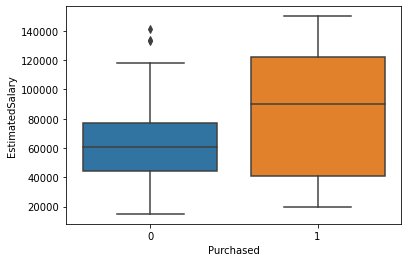

In [15]:
sns.boxplot(x=data['Purchased'],y=data['EstimatedSalary'])

# violinplot

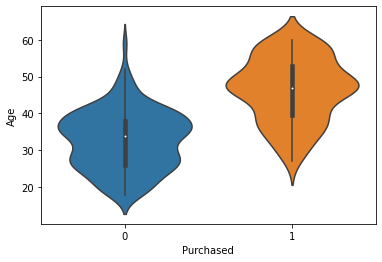

In [36]:
sns.violinplot(x=data['Purchased'],y=data['Age'])

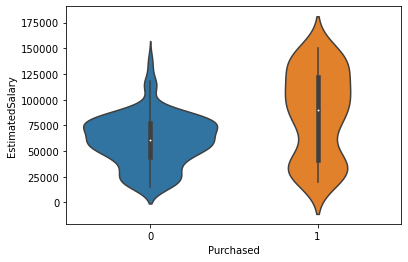

In [39]:
sns.violinplot(x=data['Purchased'],y=data['EstimatedSalary'])

- These violinplots give a lot of information:
- The thin line inside the wavey structure is box plot
- The waves on the side of each box plot are Probalility Distributions and they are symmetric
- From the box plot we can see the quartiles as mentioned above cells
- According to the 68-95-99 rule in stats
- 68% information lies in the range of 1 sigma
- 95% information lies in the range of 2 sigma
- And 99% information lies in the range of 3 sigm 